1. Title: Secondary mushroom data

2. Sources:
	(a) Mushroom species drawn from source book:
		Patrick Hardin.Mushrooms & Toadstools.
	    Zondervan, 1999
	(b) Inspired by this mushroom data:
		Jeff Schlimmer.Mushroom Data Set. Apr. 1987.
		url:https://archive.ics.uci.edu/ml/datasets/Mushroom.
	(c) Repository containing the related Python scripts and all the data sets: https://mushroom.mathematik.uni-marburg.de/files/
	(d) Author: Dennis Wagner
	(e) Date: 05 September 2020

3. Relevant information:
	This dataset includes 61069 hypothetical mushrooms with caps based on 173 species (353 mushrooms
	per species). Each mushroom is identified as definitely edible, definitely poisonous, or of
	unknown edibility and not recommended (the latter class was combined with the poisonous class).
	Of the 20 variables, 17 are nominal and 3 are metrical.

4. Data simulation:
	The related Python project (Sources (c)) contains a Python module secondary_data_generation.py
	used to generate this data based on primary_data_edited.csv also found in the repository.
	Both nominal and metrical variables are a result of randomization.
	The simulated and ordered by species version is found in secondary_data_generated.csv.
	The randomly shuffled version is found in secondary_data_shuffled.csv.

5. Class information:
	1. class		poisonous=p, edibile=e (binary)

6. Variable Information:
   (n: nominal, m: metrical; nominal values as sets of values)
   1. cap-diameter (m):			float number in cm
   2. cap-shape (n):            bell=b, conical=c, convex=x, flat=f,
sunken=s, spherical=p, others=o
   3. cap-surface (n):          fibrous=i, grooves=g, scaly=y, smooth=sБ shiny=h, leathery=l, silky=k, sticky=t, wrinkled=w, fleshy=e
   4. cap-color (n):            brown=n, buff=b, gray=g, green=r, pink=p,purple=u, red=e, white=w, yellow=y, blue=l,
orange=o,  black=k
   5. does-bruise-bleed (n):	bruises-or-bleeding=t,no=f
   6. gill-attachment (n):      adnate=a, adnexed=x, decurrent=d, free=e,
sinuate=s, pores=p, none=f, unknown=?
   7. gill-spacing (n):         close=c, distant=d, none=f
   8. gill-color (n):           see cap-color + none=f
   9. stem-height (m):			float number in cm
   10. stem-width (m):			float number in mm   
   11. stem-root (n):           bulbous=b, swollen=s, club=c, cup=u, equal=e,
rhizomorphs=z, rooted=r
   12. stem-surface (n): 		see cap-surface + none=f
   13. stem-color (n):			see cap-color + none=f
   14. veil-type (n):           partial=p, universal=u
   15. veil-color (n):          see cap-color + none=f
   16. has-ring (n):            ring=t, none=f
   17. ring-type (n):           cobwebby=c, evanescent=e, flaring=r, grooved=g,
large=l, pendant=p, sheathing=s, zone=z, scaly=y, movable=m, none=f, unknown=?
   18. spore-print-color (n):   see cap color
   19. habitat (n):             grasses=g, leaves=l, meadows=m, paths=p, heaths=h,
urban=u, waste=w, woods=d
   20. season (n):				spring=s, summer=u, autumn=a, winter=w

In [37]:
## for data
import pandas as pd
import numpy as np
## for plotting
import matplotlib.pyplot as plt
import seaborn as sns
## for statistical tests
import scipy
import statsmodels.formula.api as smf
import statsmodels.api as sm
## for machine learning
from sklearn import model_selection, preprocessing, feature_selection, ensemble, linear_model, metrics, decomposition
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

In [3]:
# Импортируем google диск

from google.colab import drive

drive.mount('/content/drive/')

Mounted at /content/drive/


In [4]:
# Считываем данные из файла secondary_data.csv

primary_data = pd.read_csv('/content/drive/My Drive/DataSet/secondary_data.csv', sep=';')

In [5]:
primary_data.head()

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,p,15.26,x,g,o,f,e,NaN,w,16.95,...,s,y,w,u,w,t,g,NaN,d,w
1,p,16.60,x,g,o,f,e,NaN,w,17.99,...,s,y,w,u,w,t,g,NaN,d,u
2,p,14.07,x,g,o,f,e,NaN,w,17.80,...,s,y,w,u,w,t,g,NaN,d,w
3,p,14.17,f,h,e,f,e,NaN,w,15.77,...,s,y,w,u,w,t,p,NaN,d,w
4,p,14.64,x,h,o,f,e,NaN,w,16.53,...,s,y,w,u,w,t,p,NaN,d,w


In [16]:
# Выводим информацию о датафрейме

primary_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61069 entries, 0 to 61068
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   class                 61069 non-null  object 
 1   cap-diameter          61069 non-null  float64
 2   cap-shape             61069 non-null  object 
 3   cap-surface           46949 non-null  object 
 4   cap-color             61069 non-null  object 
 5   does-bruise-or-bleed  61069 non-null  object 
 6   gill-attachment       51185 non-null  object 
 7   gill-spacing          36006 non-null  object 
 8   gill-color            61069 non-null  object 
 9   stem-height           61069 non-null  float64
 10  stem-width            61069 non-null  float64
 11  stem-root             9531 non-null   object 
 12  stem-surface          22945 non-null  object 
 13  stem-color            61069 non-null  object 
 14  veil-type             3177 non-null   object 
 15  veil-color         

In [17]:
def utils_recognize_type(primary_data, col, max_cat=20):
    if (primary_data[col].dtype == "O") | (primary_data[col].nunique() < max_cat):
        return "cat"
    else:
        return "num"

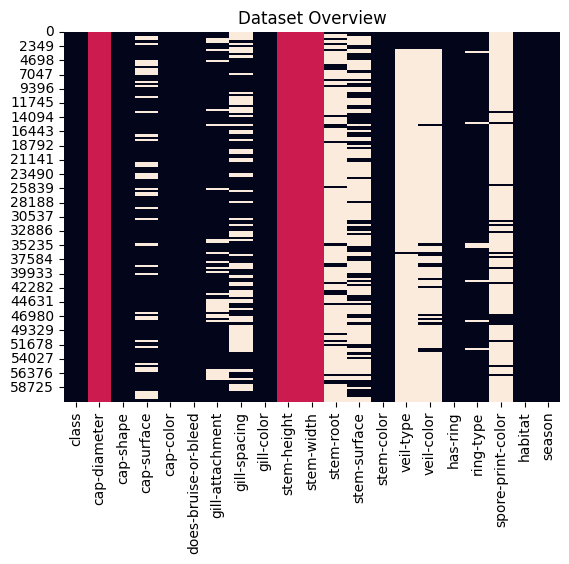

 Categerocial   Numeric   NaN 


In [18]:
dic_cols = {col:utils_recognize_type(primary_data, col, max_cat=20) for col in primary_data.columns}

heatmap = primary_data.isnull()

for k,v in dic_cols.items():
    if v == "num":
        heatmap[k] = heatmap[k].apply(lambda x: 0.5 if x is False else 1)
    else:
        heatmap[k] = heatmap[k].apply(lambda x: 0 if x is False else 1)


sns.heatmap(heatmap, cbar=False).set_title('Dataset Overview')

plt.show()
print("\033[1;37;40m Categerocial ", "\033[1;30;41m Numeric ", "\033[1;30;47m NaN ")

В столбцах 'veil-type', 'veil-color', 'stem-root' и 'spore-print-color' наибольшее количество пропусков => имеет смысл их удалить.

In [23]:
columns_to_drop = ['veil-type', 'veil-color', 'stem-root', 'spore-print-color']
data = primary_data.drop(columns=columns_to_drop)

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61069 entries, 0 to 61068
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   class                 61069 non-null  object 
 1   cap-diameter          61069 non-null  float64
 2   cap-shape             61069 non-null  object 
 3   cap-surface           46949 non-null  object 
 4   cap-color             61069 non-null  object 
 5   does-bruise-or-bleed  61069 non-null  object 
 6   gill-attachment       51185 non-null  object 
 7   gill-spacing          36006 non-null  object 
 8   gill-color            61069 non-null  object 
 9   stem-height           61069 non-null  float64
 10  stem-width            61069 non-null  float64
 11  stem-surface          22945 non-null  object 
 12  stem-color            61069 non-null  object 
 13  has-ring              61069 non-null  object 
 14  ring-type             58598 non-null  object 
 15  habitat            

Теперь неоходимо избавиться от пропусков. Удалить строки, в которых есть пропущенные значения мы не можем, так как в датасете не останется записей.

Проверено :)

Для категориальных признаков пустое значение заменим на NaN. Числовые же признаки не имею пропущенных значений. Далее закодируем категории.
Пустые значения - 0.

In [25]:
# Словарь для хранения LabelEncoders
label_encoders = {}
n = 1

# Замена NaN на 0 и других значений на 1+ с использованием LabelEncoder
for column in data.columns:
    if data[column].dtype == 'object':  # Проверяем, является ли столбец категориальным (строковым)
        # Замена NaN на специальное значение, например, "NaN" для корректной работы LabelEncoder
        has_nan = data[column].isnull().any()
        data[column] = data[column].fillna('NaN')

        # Инициализируем LabelEncoder и применяем его к столбцу
        le = LabelEncoder()
        data[column] = le.fit_transform(data[column])

        # Если в столбце не было NaN изначально, смещаем все значения на 1
        if not has_nan:
            data[column] += 1

        # Сохраняем LabelEncoder для обратного преобразования (если потребуется)
        label_encoders[column] = le

        # Вывод информации о заменах
        print(f"{n}. Заменены значения в столбце '{column}':")
        n += 1
        unique_classes = le.classes_
        for idx, original_value in enumerate(unique_classes):
            adjusted_idx = idx + 1 if not has_nan else idx
            print(f"  '{original_value}' на {adjusted_idx}")

1. Заменены значения в столбце 'class':
  'e' на 1
  'p' на 2
2. Заменены значения в столбце 'cap-shape':
  'b' на 1
  'c' на 2
  'f' на 3
  'o' на 4
  'p' на 5
  's' на 6
  'x' на 7
3. Заменены значения в столбце 'cap-surface':
  'NaN' на 0
  'd' на 1
  'e' на 2
  'g' на 3
  'h' на 4
  'i' на 5
  'k' на 6
  'l' на 7
  's' на 8
  't' на 9
  'w' на 10
  'y' на 11
4. Заменены значения в столбце 'cap-color':
  'b' на 1
  'e' на 2
  'g' на 3
  'k' на 4
  'l' на 5
  'n' на 6
  'o' на 7
  'p' на 8
  'r' на 9
  'u' на 10
  'w' на 11
  'y' на 12
5. Заменены значения в столбце 'does-bruise-or-bleed':
  'f' на 1
  't' на 2
6. Заменены значения в столбце 'gill-attachment':
  'NaN' на 0
  'a' на 1
  'd' на 2
  'e' на 3
  'f' на 4
  'p' на 5
  's' на 6
  'x' на 7
7. Заменены значения в столбце 'gill-spacing':
  'NaN' на 0
  'c' на 1
  'd' на 2
  'f' на 3
8. Заменены значения в столбце 'gill-color':
  'b' на 1
  'e' на 2
  'f' на 3
  'g' на 4
  'k' на 5
  'n' на 6
  'o' на 7
  'p' на 8
  'r' на 9
  

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61069 entries, 0 to 61068
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   class                 61069 non-null  int64  
 1   cap-diameter          61069 non-null  float64
 2   cap-shape             61069 non-null  int64  
 3   cap-surface           61069 non-null  int64  
 4   cap-color             61069 non-null  int64  
 5   does-bruise-or-bleed  61069 non-null  int64  
 6   gill-attachment       61069 non-null  int64  
 7   gill-spacing          61069 non-null  int64  
 8   gill-color            61069 non-null  int64  
 9   stem-height           61069 non-null  float64
 10  stem-width            61069 non-null  float64
 11  stem-surface          61069 non-null  int64  
 12  stem-color            61069 non-null  int64  
 13  has-ring              61069 non-null  int64  
 14  ring-type             61069 non-null  int64  
 15  habitat            

In [28]:
# Числовые столбцы
numeric_columns = ['cap-diameter', 'stem-height', 'stem-width']

# Экземпляр StandardScaler
scaler = StandardScaler()

# Стандартизация только к числовым столбцам
data[numeric_columns] = scaler.fit_transform(data[numeric_columns])

In [29]:
data.head()

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-surface,stem-color,has-ring,ring-type,habitat,season
0,2,1.619462,7,3,7,1,3,0,11,3.076705,0.492293,8,12,2,3,1,4
1,2,1.873982,7,3,7,1,3,0,11,3.385311,0.601900,8,12,2,3,1,3
2,2,1.393432,7,3,7,1,3,0,11,3.328931,0.557061,8,12,2,3,1,4
3,2,1.412426,3,4,2,1,3,0,11,2.726555,0.381690,8,12,2,6,1,4
4,2,1.501699,7,4,7,1,3,0,11,2.952075,0.503254,8,12,2,6,1,4


Далее несколько графиков, для разных столбцов.

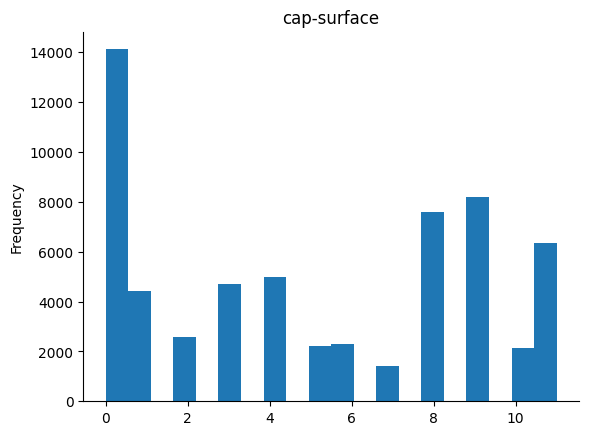

In [33]:
# @title cap-surface

from matplotlib import pyplot as plt
data['cap-surface'].plot(kind='hist', bins=20, title='cap-surface')
plt.gca().spines[['top', 'right',]].set_visible(False)

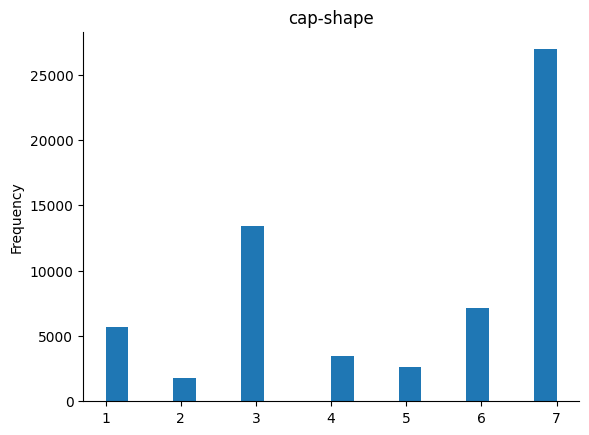

In [32]:
# @title cap-shape

from matplotlib import pyplot as plt
data['cap-shape'].plot(kind='hist', bins=20, title='cap-shape')
plt.gca().spines[['top', 'right',]].set_visible(False)

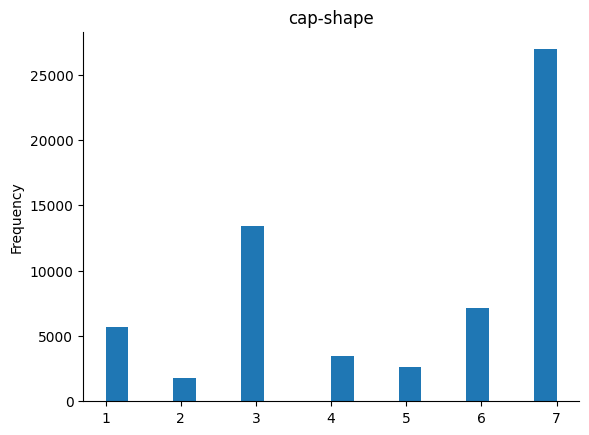

In [31]:
# @title cap-shape

from matplotlib import pyplot as plt
data['cap-shape'].plot(kind='hist', bins=20, title='cap-shape')
plt.gca().spines[['top', 'right',]].set_visible(False)

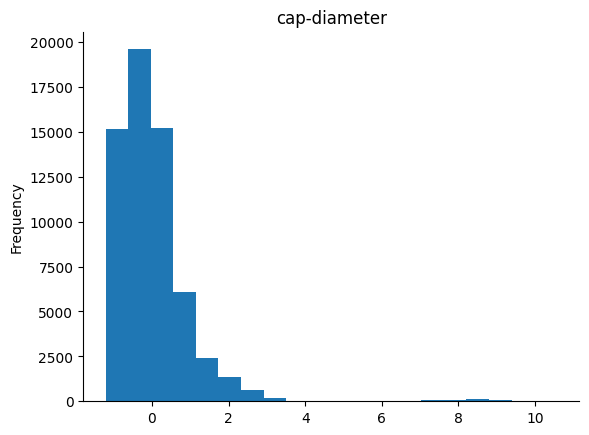

In [30]:
# @title cap-diameter

from matplotlib import pyplot as plt
data['cap-diameter'].plot(kind='hist', bins=20, title='cap-diameter')
plt.gca().spines[['top', 'right',]].set_visible(False)

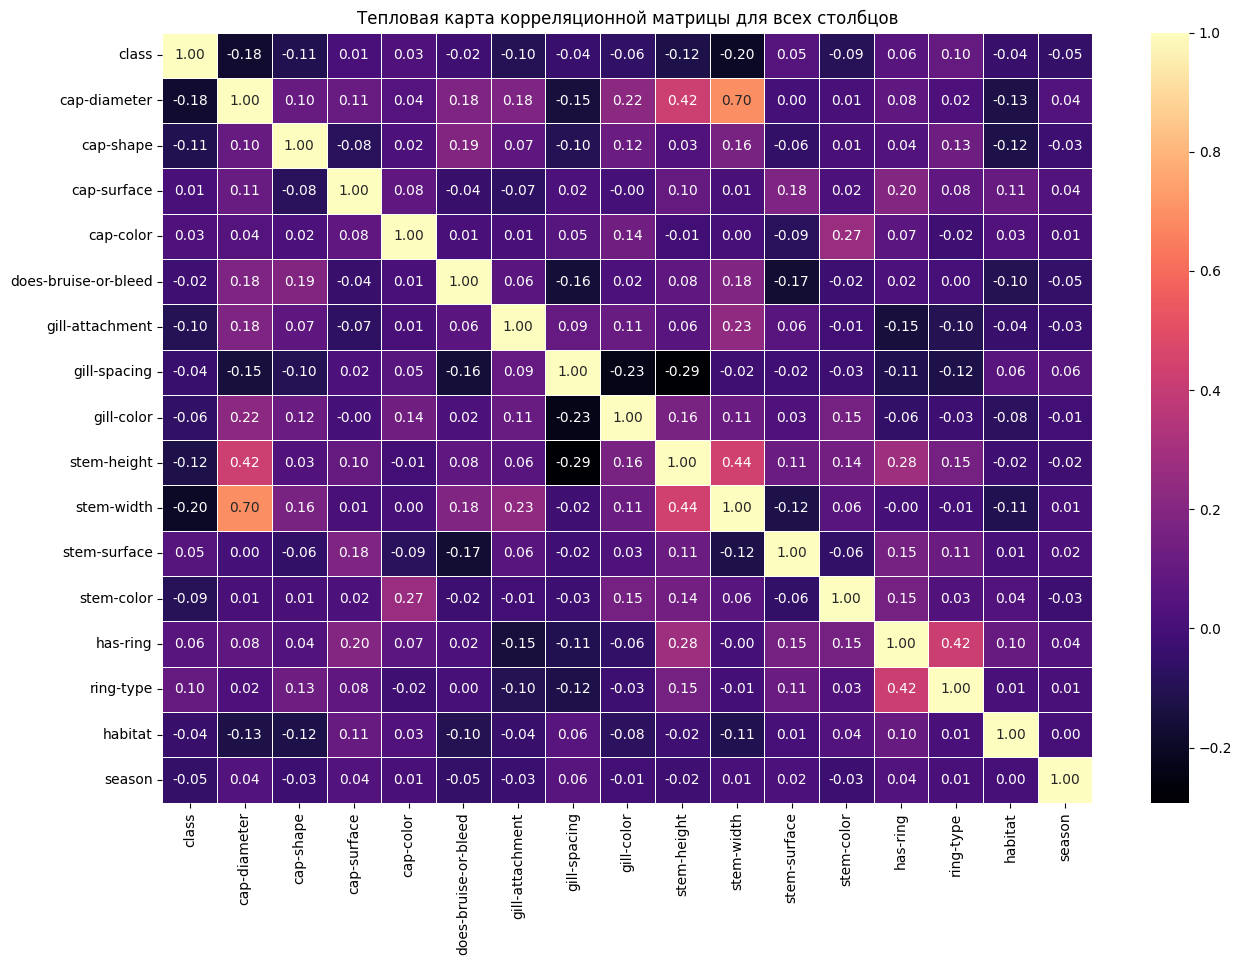

In [43]:
# Расчет корреляционной матрицы для всех числовых столбцов в датафрейме
corr_matrix = data.corr()

# Построение тепловой карты
plt.figure(figsize=(15, 10))  # Увеличение размера графика для лучшей читаемости
sns.heatmap(corr_matrix, annot=True, cmap='magma', fmt=".2f", linewidths=0.5)
plt.title('Тепловая карта корреляционной матрицы для всех столбцов')
plt.show()

In [35]:
# Разделите данные на признаки (X) и целевую переменную (y)
X = data.drop('class', axis=1)
y = data['class']


In [38]:
# Разделите данные на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [39]:
# Создайте и обучите модель классификации
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [42]:
# Предсказания
y_pred = clf.predict(X_test)

# Оценка модели
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Точность: {accuracy:.2f}")
print("Отчет о классификации:")
print(report)

Точность: 1.00
Отчет о классификации:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00      5374
           2       1.00      1.00      1.00      6840

    accuracy                           1.00     12214
   macro avg       1.00      1.00      1.00     12214
weighted avg       1.00      1.00      1.00     12214



Модель правильно классифицировала все примеры в тестовой выборке. Точность 1.00 (или 100%) указывает на то, что нет ошибок в предсказаниях.